In [1]:
import IPython as ipy
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.utils
import torch.optim as optim
import torch.utils.data as data
from tqdm.auto import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device:', device)

import itertools as it
import time

device: cuda


In [2]:
def combine_datasets(out_path, in_path_1, in_path_2):
    with open(out_path, 'w') as of:
        with open(in_path_1, 'r') as if1:
            for l in tqdm(if1, desc=in_path_1):
                of.write(l)
        with open(in_path_2, 'r') as if2:
            if2.readline();
            for l in tqdm(if2, desc=in_path_2):
                of.write(l)
    return

In [3]:
#combine_datasets('data/ner-gmb/train+dev.txt', 'data/ner-gmb/train.txt', 'data/ner-gmb/dev.txt')

In [4]:
def build_vocab_from_file(path):
    with open(path) as f:
        d = dict(zip(tqdm(set((l.split(' ')[0] for l in tqdm(f, path) if l.strip())), 'tokens'), it.count(1)))
    assert('PAD_TOKEN' not in d)
    d['PAD_TOKEN'] = 0
    return d

In [5]:
diff = build_vocab_from_file('data/ner-gmb/test.txt').keys() - build_vocab_from_file('data/ner-gmb/train+dev.txt').keys()

In [19]:
glv_diff = build_vocab_from_file('data/ner-gmb/test.txt').keys() - set(glv_words)

In [21]:
glv_diff

{'10-month-old',
 '11705',
 '11725',
 '12,348',
 '12-kilometer-high',
 '12-year-civil',
 '13,543',
 '133.43',
 '14-kilometer-long',
 '150-meter-long',
 '16-goal',
 '162-7',
 '18-years-old',
 '18:46.09',
 '197-page',
 '1:37.70',
 '1:37.74',
 '1:38.53',
 '2-2.5',
 '216-3',
 '218-5',
 '22-month-old',
 '22.772',
 '24:57.06',
 '25-meter-high',
 '25-meter-long',
 '25-years-old',
 '352.9',
 '360-megawatt',
 '361.8',
 '37,858',
 '38.875',
 '4,153,237',
 '4,218',
 '46,265',
 '5,588',
 '5.5-hour',
 '55-to-45',
 '60-to-36',
 '650-thousand',
 '69-43',
 '7,864',
 '71-person',
 '7115',
 '75-minute-long',
 '752.2',
 '762.4',
 '77-year-old',
 '8,206',
 '8,956',
 '86-year-old',
 '97-year-old',
 '9885',
 '@dalailama',
 'PAD_TOKEN',
 'a-h1n1',
 'abdel-al',
 'abdouramane',
 'abdul-mahdi',
 'above-market',
 'abu-hafs',
 'accus',
 'activist-journalist',
 'adijon',
 'aero-technology',
 'afghan-american',
 'afghan-based',
 'afghan-coalition',
 'afghan-international',
 'afghan-nato',
 'agha-mohammadi',
 'agric

In [20]:
len(glv_diff)

877

In [8]:
comm = set(build_vocab_from_file('data/ner-gmb/test.txt').keys()).intersection(build_vocab_from_file('data/ner-gmb/train+dev.txt'))

In [9]:
comm

{'boldak',
 'miami',
 '48',
 'anders',
 'waterfowl',
 'serve',
 'perkins',
 'geographic',
 'propaganda',
 'world',
 'violence-ridden',
 'opposite',
 'sympathizer',
 'idiot',
 '439',
 'ariel',
 'exercise',
 'before',
 'shift',
 'unpopular',
 'pasta',
 'check',
 'leonid',
 'g7',
 'tycoon',
 'revenge',
 'safe',
 'yasukuni',
 'pattani',
 'aftermath',
 'southeastern',
 'abandoned',
 'duma',
 'unwanted',
 'PAD_TOKEN',
 'herd',
 'achouri',
 'ankle',
 'jerry',
 'goushmane',
 'kindergarten',
 'fed',
 'lease',
 'iqbal',
 'dictator',
 'wardak',
 'united',
 'walk',
 'predict',
 'facilitator',
 'quito',
 'pride',
 'case',
 'evaluation',
 '8.5',
 'population',
 'olpc',
 '6-2',
 'shargudud',
 'unstable',
 'expert',
 'ceramic',
 'sailing',
 'filmmaker',
 'restructure',
 'pollution',
 'associate',
 'aharonot',
 'christofias',
 'standing',
 'pro-rebel',
 'chiluba',
 'layoff',
 'abandon',
 'moon',
 'release',
 'muluzi',
 'significantly',
 'typhoon',
 'flag-waving',
 'provide',
 '17',
 'fulfill',
 'austro

In [6]:
diff

{'dubrovka',
 'paroled',
 'unmarried',
 '1:16',
 'vh1',
 'chinese-u.s.',
 'général',
 '1634',
 'dahab',
 'pear',
 'shaima',
 'hosada',
 'compaore',
 'low-ranking',
 'haidallah',
 'dosage',
 'mosquito-infested',
 'chongq',
 'teknaf',
 'kamel',
 'magande',
 'dollar-based',
 'highest-rated',
 'neo-nazus',
 'fuel-pump',
 'zabihullah',
 '51.6',
 'heavy-polluting',
 'non-member',
 'lutfalla',
 'illusion',
 'tajbakhsh',
 '1650',
 'jabouri',
 'krom',
 'unfastened',
 'mischance',
 'business-friendly',
 'arawak',
 "'n",
 'mi-17',
 'capitalization',
 '499',
 'governorate',
 '197-page',
 'geert',
 '1802',
 'lubiani',
 'buoyant',
 'seventy-five',
 'flourishing',
 'monthlong',
 'giri',
 '73rd',
 'nigerian',
 'wired.com',
 'base-closing',
 'replication',
 'two-month',
 'supra',
 'hand-in-hand',
 'muttehida',
 'lamm',
 'mayardit',
 '102-member',
 'el~fashar',
 'semiarid',
 'azzedine',
 'v-for-victory',
 'israeli-egyptian',
 'overreact',
 'stateless',
 'overdraft',
 'russian-american',
 'awoke',
 'coal

In [10]:
len(comm)

11636

In [11]:
len(diff)

2646

In [12]:
with open('data/glove/glove.6B.100d.txt') as f:
    glv_words = [l.split()[0] for l in f]

In [18]:
len(diff - set(glv_words))

563

In [15]:
glv_words

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')',
 'from',
 'his',
 "''",
 '``',
 'an',
 'be',
 'has',
 'are',
 'have',
 'but',
 'were',
 'not',
 'this',
 'who',
 'they',
 'had',
 'i',
 'which',
 'will',
 'their',
 ':',
 'or',
 'its',
 'one',
 'after',
 'new',
 'been',
 'also',
 'we',
 'would',
 'two',
 'more',
 "'",
 'first',
 'about',
 'up',
 'when',
 'year',
 'there',
 'all',
 '--',
 'out',
 'she',
 'other',
 'people',
 "n't",
 'her',
 'percent',
 'than',
 'over',
 'into',
 'last',
 'some',
 'government',
 'time',
 '$',
 'you',
 'years',
 'if',
 'no',
 'world',
 'can',
 'three',
 'do',
 ';',
 'president',
 'only',
 'state',
 'million',
 'could',
 'us',
 'most',
 '_',
 'against',
 'u.s.',
 'so',
 'them',
 'what',
 'him',
 'united',
 'during',
 'before',
 'may',
 'since',
 'many',
 'while',
 'where',
 'states',
 'because',
 'now',
 'city',
 'made',
 'like',
 

In [5]:
#token_to_id = build_vocab_from_file('data/ner-gmb/train+dev.txt')
#torch.save(token_to_id, 'data/pt-cache/token_to_id.pt')
token_to_id = torch.load('data/pt-cache/token_to_id.pt')

In [6]:
def get_classes_from_file(path):
    with open(path) as f:
        id_to_label = list(tqdm(set((l.strip().split(' ')[3] for l in tqdm(f, path) if l.strip())), 'classes'))
        assert('PAD_LABEL' not in id_to_label)
        id_to_label.append('PAD_LABEL')
    label_to_id = {k:v for v, k in enumerate(id_to_label)}
    return label_to_id, id_to_label

In [7]:
#label_to_id, id_to_label = get_classes_from_file('data/ner-gmb/train+dev.txt')
#torch.save((label_to_id, id_to_label), 'data/pt-cache/label_to_id__id_to_label.pt')
label_to_id, id_to_label = torch.load('data/pt-cache/label_to_id__id_to_label.pt')

In [8]:
def get_X_Y_from_file(path, token_to_id, label_to_id, seq_len=128):
    with open(path) as f:
        seqs = f.read().split('\n\n')
        seqs.pop()
        seqs[0] = seqs[0][1:]
    X = torch.zeros((len(seqs), seq_len), dtype=torch.long)
    Y = torch.zeros((len(seqs), seq_len), dtype=torch.long)
    for i, seq in enumerate(tqdm(seqs, 'sequences')):
        for j, l in enumerate(seq.split('\n')):
            assert(j < seq_len)
            token, _, _, label = l.split(' ')
            try:
                X[i,j] = token_to_id[token]
            except KeyError:
                pass
            Y[i,j] = label_to_id[label]
    return X, Y

In [9]:
#train_X, train_Y = get_X_Y_from_file('data/ner-gmb/train.txt', token_to_id, label_to_id)
#torch.save((train_X, train_Y), 'data/pt-cache/train_X__train_Y.pt')
train_X, train_Y = torch.load('data/pt-cache/train_X__train_Y.pt')

In [10]:
#dev_X, dev_Y = get_X_Y_from_file('data/ner-gmb/dev.txt', token_to_id, label_to_id)
#torch.save((dev_X, dev_Y), 'data/pt-cache/dev_X__dev_Y.pt')
dev_X, dev_Y = torch.load('data/pt-cache/dev_X__dev_Y.pt')

In [11]:
#test_X, test_Y = get_X_Y_from_file('data/ner-gmb/test.txt', token_to_id, label_to_id)
#torch.save((test_X, test_Y), 'data/pt-cache/test_X__test_Y.pt')
test_X, test_Y = torch.load('data/pt-cache/test_X__test_Y.pt')

In [12]:
def init_glove_embeddings(path, token_to_id):
    glv = {}
    with open(path, 'r') as f:
        for l in tqdm(f, path):
            k, *v = l.strip().split(' ')
            v = torch.tensor([float(x) for x in v])
            glv[k] = v
            dim = v.shape[0]
            assert(k != 'PAD_TOKEN')
    emb = torch.randn(len(token_to_id), dim)
    for k,v in tqdm(token_to_id.items(), 'tokens'):
        if k in glv:
            emb[v] = glv[k]
    return emb

In [13]:
#glove_emb = init_glove_embeddings('data/glove/glove.6B.100d.txt', token_to_id)
#torch.save(glove_emb, 'data/pt-cache/glove_emb.pt')
glove_emb = torch.load('data/pt-cache/glove_emb.pt')

In [18]:
class BiLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dims, hidden_dims, n_classes, embeddings=None, dropout_prob=0.5):
        super().__init__()
        self.hidden_dims = hidden_dims
        if embeddings is None:
            self.embedding = nn.Embedding(vocab_size, embedding_dims, padding_idx=0)
        else:
            assert(embeddings.shape[0] == vocab_size)
            assert(embeddings.shape[1] == embedding_dims)
            self.embedding = nn.Embedding.from_pretrained(embeddings, freeze=False, padding_idx=0)
        self.dropout = nn.Dropout(dropout_prob)
        self.lstm_cell_f = nn.LSTMCell(embedding_dims, hidden_dims)
        self.h0_f = nn.Parameter(torch.zeros(hidden_dims))
        self.c0_f = nn.Parameter(torch.zeros(hidden_dims))
        self.lstm_cell_b = nn.LSTMCell(embedding_dims, hidden_dims)
        self.h0_b = nn.Parameter(torch.zeros(hidden_dims))
        self.c0_b = nn.Parameter(torch.zeros(hidden_dims))
        self.linear = nn.Linear(2*hidden_dims, n_classes-1)
        self.cross_entropy_loss = nn.CrossEntropyLoss(ignore_index=n_classes-1) # weighted loss?
        
    def forward(self, X):
        E = self.embedding(X)
        D = self.dropout(E)
        H = torch.empty(X.shape[0], X.shape[1], 2*self.hidden_dims, device=X.device)
        
        h = self.h0_f.expand(X.shape[0], -1)
        c = self.c0_f.expand(X.shape[0], -1)
        for i in range(X.shape[1]):
            h, c = self.lstm_cell_f(D[:,i,:], (h, c))
            H[:,i,:self.hidden_dims] = h

        h = self.h0_b.expand(X.shape[0], -1)
        c = self.c0_b.expand(X.shape[0], -1)
        for i in range(X.shape[1]-1,-1,-1):
            h, c = self.lstm_cell_b(D[:,i,:], (h, c))
            H[:,i,-self.hidden_dims:] = h
        
        return self.linear(H)
    
    def predict(self, X):
        with torch.no_grad():
            self.eval()
            return torch.argmax(self(X), dim=-1)
    
    def criterion(self, Y, Y_hat):
        return self.cross_entropy_loss(Y_hat.transpose(1,2), Y)

In [19]:
def metrics(Y_true, Y_pred, n_classes):
    with torch.no_grad():
        assert(Y_true.shape == Y_pred.shape)
        Y_true = Y_true.reshape(-1)
        Y_pred = Y_pred.reshape(-1)
        Y_pred = Y_pred[Y_true != n_classes-1]
        Y_true = Y_true[Y_true != n_classes-1]
        acc = torch.sum(Y_true == Y_pred).float() / torch.numel(Y_true)
        Z_true = F.one_hot(Y_true, n_classes-1)
        Z_pred = F.one_hot(Y_pred, n_classes-1)
        S_tp = torch.sum(Z_true & Z_pred, dim=0).float()
        S_t = torch.sum(Z_true, dim=0).float()
        S_p = torch.sum(Z_true, dim=0).float()
        micro_F1 = 2 * torch.sum(S_tp) / (torch.sum(S_t) + torch.sum(S_p))
        macro_F1 = torch.mean(2 * S_tp / (S_t + S_p))
        return [acc.item(), micro_F1.item(), macro_F1.item()]

In [20]:
net = BiLSTM(len(token_to_id), 100, 100, len(label_to_id), glove_emb)
#net.load_state_dict(torch.load('model_2.1.1.pt'))

In [21]:
opt = optim.SGD(net.parameters(), lr=0.01)

In [22]:
train_loader = data.DataLoader(data.TensorDataset(train_X, train_Y), batch_size=128, shuffle=True)

In [23]:
dev_loader = data.DataLoader(data.TensorDataset(dev_X, dev_Y), batch_size=128, shuffle=True)

In [24]:
def train_loop(net, opt, train_loader, dev_loader,
               train_X, train_Y, dev_X, dev_Y, test_X, test_Y, n_classes,
               grad_clip_norm=5):
    net = net.to(device)
    train_losses = []
    dev_losses = []
    train_metrics = []
    dev_metrics = []
    test_metrics = []
    while True:
        new_train_losses = []
        new_dev_losses = []
        for (train_X_batch, train_Y_batch), (dev_X_batch, dev_Y_batch) in \
        zip(tqdm(train_loader, 'batches'), it.cycle(dev_loader)):
            with torch.no_grad():
                net.eval()
                dev_X_batch = dev_X_batch.to(device)
                dev_Y_batch = dev_Y_batch.to(device)
                dev_loss = net.criterion(dev_Y_batch, net(dev_X_batch))
                new_dev_losses.append(dev_loss.item())
            
            net.train()
            train_X_batch = train_X_batch.to(device)
            train_Y_batch = train_Y_batch.to(device)
            train_loss = net.criterion(train_Y_batch, net(train_X_batch))
            new_train_losses.append(train_loss.item())
            opt.zero_grad()
            train_loss.backward()
            nn.utils.clip_grad_norm_(net.parameters(), grad_clip_norm)
            opt.step()
            
        train_losses += new_train_losses
        dev_losses += new_dev_losses
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        plt.plot(train_losses, label='train')
        plt.plot(dev_losses, label='dev')
        plt.legend()
        plt.title('All Epochs')
        plt.xlabel('iterations')
        plt.ylabel('loss')
        plt.subplot(122)
        plt.plot(new_train_losses, label='train')
        plt.plot(new_dev_losses, label='dev')
        plt.legend()
        plt.title('Last Epoch')
        plt.xlabel('iterations')
        plt.ylabel('loss')
        ipy.display.clear_output(wait=True)
        plt.show()
        
        train_metrics.append(metrics(train_Y.to(device), net.predict(train_X.to(device)), n_classes))
        dev_metrics.append(metrics(dev_Y.to(device), net.predict(dev_X.to(device)), n_classes))
        test_metrics.append(metrics(test_Y.to(device), net.predict(test_X.to(device)), n_classes))
        train_metrics_np = np.array(train_metrics)
        dev_metrics_np = np.array(dev_metrics)
        test_metrics_np = np.array(test_metrics)
        plt.figure(figsize=(15,4))
        plt.subplot(131)
        plt.plot(train_metrics_np[:,0], 'x', label='train')
        plt.plot(dev_metrics_np[:,0], 'x', label='dev')
        plt.plot(test_metrics_np[:,0], 'x', label='test')
        plt.legend()
        plt.title('Accuracy')
        plt.xlabel('epochs')
        plt.ylim(0,1)
        plt.subplot(132)
        plt.plot(train_metrics_np[:,1], 'x', label='train')
        plt.plot(dev_metrics_np[:,1], 'x', label='dev')
        plt.plot(test_metrics_np[:,1], 'x', label='test')
        plt.legend()
        plt.suptitle('Micro-F1')
        plt.xlabel('epochs')
        plt.ylim(0,1)
        plt.subplot(133)
        plt.plot(train_metrics_np[:,2], 'x', label='train')
        plt.plot(dev_metrics_np[:,2], 'x', label='dev')
        plt.plot(test_metrics_np[:,2], 'x', label='test')
        plt.legend()
        plt.title('Macro-F1')
        plt.xlabel('epochs')
        plt.ylim(0,1)
        plt.show()

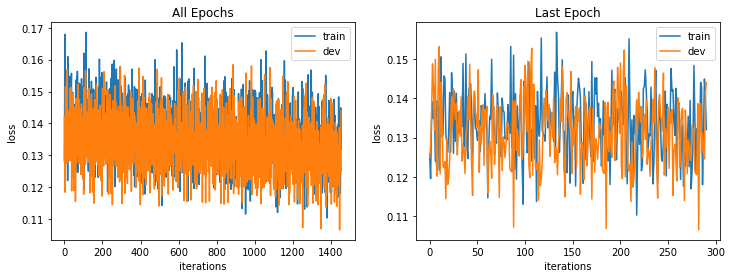

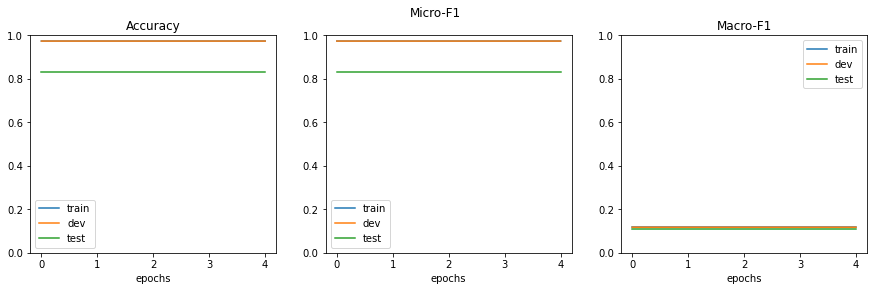

KeyboardInterrupt: 

In [78]:
train_loop(net, opt, train_loader, dev_loader, train_X, train_Y, dev_X, dev_Y, test_X, test_Y, len(label_to_id))

In [25]:
s = set()
for k,_ in token_to_id.items():
    for c in k:
        
list(k) for k,_ in token_to_id.items()

TypeError: unhashable type: 'list'

In [ ]:
class CharEmbedding(nn.Module):
    def __init__(self):
        super().__init__()
        